# Assignment 5: Topic Models

> net id: sa857

Due: Tuesday, November 5.

This assignment has three problems. The first is about Bayesian inference. The second two are about topic models. You will first work with abstracts of scientific articles. These abstracts are obtained from arXiv.org, an open access repository for e-prints of articles in scientific fields maintained by Cornell University. You will then work with a collection of movie plots.

*For your convenience, we have separated the problems into three notebooks: assn5_problem1.ipynb, assn5_problem2.ipynb, and assn5_problem3.ipynb. Submit your solutions in these three notebooks, printing out each as a separate pdf.*

We provide significant "starter code" as discussed in lecture. We then ask you build topic models using the Python library gensim, and do some analysis over the topics obtained.

We ask that you please at least start the assignment right away. If you have any difficulties running gensim we would like to know!

## Problem 1: Bayes

Consider the scenario of rolling a 4-sided die with the numbers $1$, $2$, $3$, and $4$ on its faces. Suppose we roll this die many times and get a collection of $n$ outcomes represented by $X_{1}, X_{2}, ..., X_{n}$. Here each $X_{i}$ is a random variable that independently follows a Multinomial$(p_{1}, p_{2}, p_{3}, p_{4})$ model (where $p_{1}+p_{2}+p_{3}+p_{4}=1$).

- the die has 4 sides, whenever you roll you can get four choices per outcome Xi. Xi is a multinomial composed of four probabilities (one for each side of the die)

This die may or may not be fair. If it were fair then $p_{1}=p_{2}=p_{3}=p_{4}=0.25$, but since we are uncertain about these parameters we treat them as random and the problem requires Bayesian inference.

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

### Part (a)

For all of Problem 1 we will assume that $(p_{1}, p_{2}, p_{3}, p_{4})$ follows a Dirichlet$(\alpha_{1}, \alpha_{2}, \alpha_{3}, \alpha_{4})$ distribution where $\alpha_{1}, \alpha_{2}, \alpha_{3}, \alpha_{4}$ are unknown, positive-valued parameters. Suppose we have a prior belief that the four-sided die is close to being fair. This is represented by $\alpha_{1}= \alpha_{2}= \alpha_{3}= \alpha_{4} = c$ for some positive real number $c$.

- We assume some prior distribution over the 4 parameters p1,p2,p3,p4. It is a dirichilet 

For $c = 0.1, 1, 10, 30, 60, 100, 1000$ draw $1000$ samples of $(p_{1}, p_{2}, p_{3}, p_{4})$ from a Dirichlet$(c,c,c,c)$ distribution. For this sample, calculate the mean and standard deviation of $p_{1}$. Create a plot of $log(c)$ vs. the mean and another plot of $log(c)$ vs. the standard deviation. Describe in your own words what happens to these two quantities as $c$ increases.

In [115]:
import warnings
warnings.filterwarnings("ignore")
from dirichlet import *

In [116]:
c_arr = [0.1, 1, 10, 30, 60, 100, 1000]
p1_means = []
p1_stds = []

In [117]:
# get 1000 samples
for c in c_arr:
    samples = np.random.dirichlet([c, c, c, c], 1000)
    p1_all = samples[:,0]
    p1_mean = np.mean(p1_all)
    p1_std = np.std(p1_all)
    
    p1_means.append(p1_mean)
    p1_stds.append(p1_std)

Text(0.5, 1.0, 'log(c) vs the p1 mean')

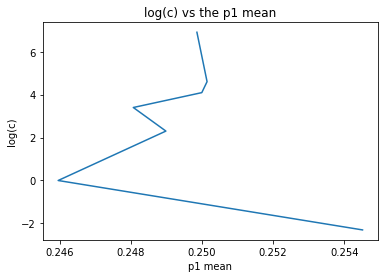

In [118]:
plt.plot(p1_means, np.log(c_arr))
plt.ylabel("log(c)")
plt.xlabel("p1 mean")
plt.title("log(c) vs the p1 mean")

- As c (or log(c)) increases, the mean initially spikes and then stabilizes to about 0.25

Text(0.5, 1.0, 'log(c) vs the p1 std')

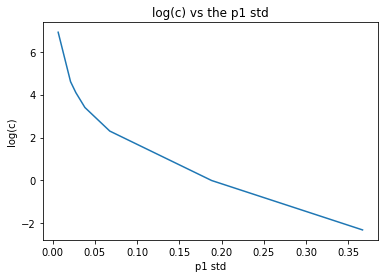

In [119]:
plt.plot(p1_stds, np.log(c_arr))
plt.ylabel("log(c)")
plt.xlabel("p1 std")
plt.title("log(c) vs the p1 std")

- As c (or log(c)) increaes, the standard deviation falls steadily to about 0.

### Part (b)

The following cell loads 10,000 rolls for the four-sided die. $[1,0,0,0]$ indicates that the die landed on face $1$, $[0,1,0,0]$ indicates that the die landed on face $2$, and so on. For $c = 0.1, 1, 10, 30, 60, 100, 1000$, use Dirichlet$(c,c,c,c)$ as the prior distribution for $(p_{1}, p_{2}, p_{3}, p_{4})$. *Using only the first $100$ rolls of the die*, calculate the mean of the posterior distribution. What do you notice about the posterior mean as $c$ increases?

Give code to compute the answer and plot the results. Also, give a markdown cell with a mathematical expression for the solution.

Hint: The mean of the Dirichlet$(\alpha_{1}, \alpha_{2}, \alpha_{3}, \alpha_{4})$ is $\left( \dfrac{\alpha_{1}}{\alpha_{1} + \alpha_{2} +\alpha_{3} +\alpha_{4}}, \dfrac{\alpha_{2}}{\alpha_{1} + \alpha_{2} +\alpha_{3} +\alpha_{4}}, \dfrac{\alpha_{3}}{\alpha_{1} + \alpha_{2} +\alpha_{3} +\alpha_{4}}, \dfrac{\alpha_{4}}{\alpha_{1} + \alpha_{2} +\alpha_{3} +\alpha_{4}} \right)$

In [120]:
with open("X.pkl", "rb") as f:
    X = pickle.load(f)

In [121]:
def dirichlet_mean(alpha_arr):
    a1, a2, a3, a4 = alpha_arr
    a_sum = sum(alpha_arr)
    return [a1/a_sum, a2/a_sum, a3/a_sum, a4/a_sum]

In [122]:
first_100_rolls = X[:100]
x_throws = [sum(first_100_rolls[:,0]), 
     sum(first_100_rolls[0:,1]), 
     sum(first_100_rolls[1:,2]), 
     sum(first_100_rolls[2:,3])]

In [123]:
def cumulativeThrows(throws):
    return [sum(throws[:,0]), 
            sum(throws[0:,1]), 
            sum(throws[1:,2]), 
            sum(throws[2:,3])]

In [124]:
x_throws = cumulativeThrows(first_100_rolls)

In [125]:
# Your code here

# for each c, 

    # roll the die 100 times (you already have this data)
    # update your params and calculate posterior 
    
    # no need to sample from the posterior since we have a conjugate
    # prior that we're working with, and the posterior mean should be
    # an exact mean 

c_arr = [0.1, 1, 10, 30, 60, 100, 1000]
d_means = []

for c in c_arr:
    # create the initial alpha
    alpha_0 = [c, c, c, c]

    # the randomnness part has already been done in the pickle file
    alpha = np.add(alpha_0, x_throws)

    # calculate the mean of the Dirchlet from alpha
    posterior_mean = dirichlet_mean(alpha)

    d_means.append(posterior_mean)

Markdown mathematical expression:
- alpha1 = alpha1 + total(p1 == 1)
- alpha2 = alpha2 + total(p2 == 1)
- alpha3 = alpha3 + total(p3 == 1)
- alpha4 = alpha4 + total(p4 == 1)
- alpha sum = alpha1 + alpha2 + alpha3 + alpha4
- posterior mean = alpha1/sum, alpha2/sum, alpha3/sum, alpha4/sum

In [126]:
d_means = np.array(d_means)
p1_means = d_means[:,0]

Text(0.5, 1.0, 'p1 mean vs log(c)')

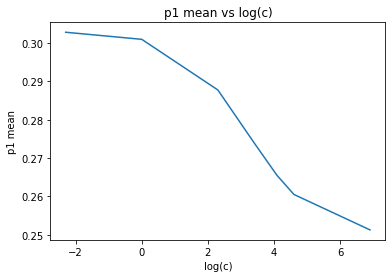

In [127]:
# plot
plt.plot(np.log(c_arr), p1_means)
plt.ylabel("p1 mean")
plt.xlabel("log(c)")
plt.title("p1 mean vs log(c)")

- As c increases, there is a steady decrease / stabilization of the mean towards 0.25

### Part (c)

Now repeat the process in Part (b), but with sample sizes $N = 100, 200, 300, ..., 9900, 10000$. For each value of $c$, create a plot that shows the trend of the posterior mean for $p_{1}$ as a function of sample size $N$. Create a similar plot for $p_{2}$, $p_{3}$, and $p_{4}$. Explain what these plots illustrate about the choice of prior and the sample size. What do you estimate were the true parameters used to generate this dataset?

In [134]:
c_arr = [0.1, 1, 10, 30, 60, 100, 1000]
d_means = [] 
# this contains arrays of arrays
# the first level is for each value of c (7), and inside that sample size (100)

num_throws_range = np.arange(100, 10001, 100)

for c in c_arr:
    # get the initial alpha
    alpha_0 = [c, c, c, c]
    
    # storage
    d_means_inner = []
    
    # get the number of throws
    for num_throws in num_throws_range:
        
        # sample how many throws
        sample_throws = X[:num_throws]
        
        # accumulate them into one array
        cumulate_throws = cumulativeThrows(sample_throws)
        
        # modify the alpha
        alpha = np.add(alpha_0, cumulate_throws)
        
        # calculate the mean of the Dirichlet from alpha
        posterior_mean = dirichlet_mean(alpha)
        d_means_inner.append(posterior_mean)
        
    # add these means to array for this value of c
    d_means.append(d_means_inner)
    
    
# data conversion
d_means = np.array(d_means)

In [135]:
d_means.shape
# 7 items in the first level, composed of 100 
# (i.e for each sample size), and (p1,p2,p3,p4)

(7, 100, 4)

In [ ]:
# test to show c[0] and inside that, p1
# d_means[0][:,0]

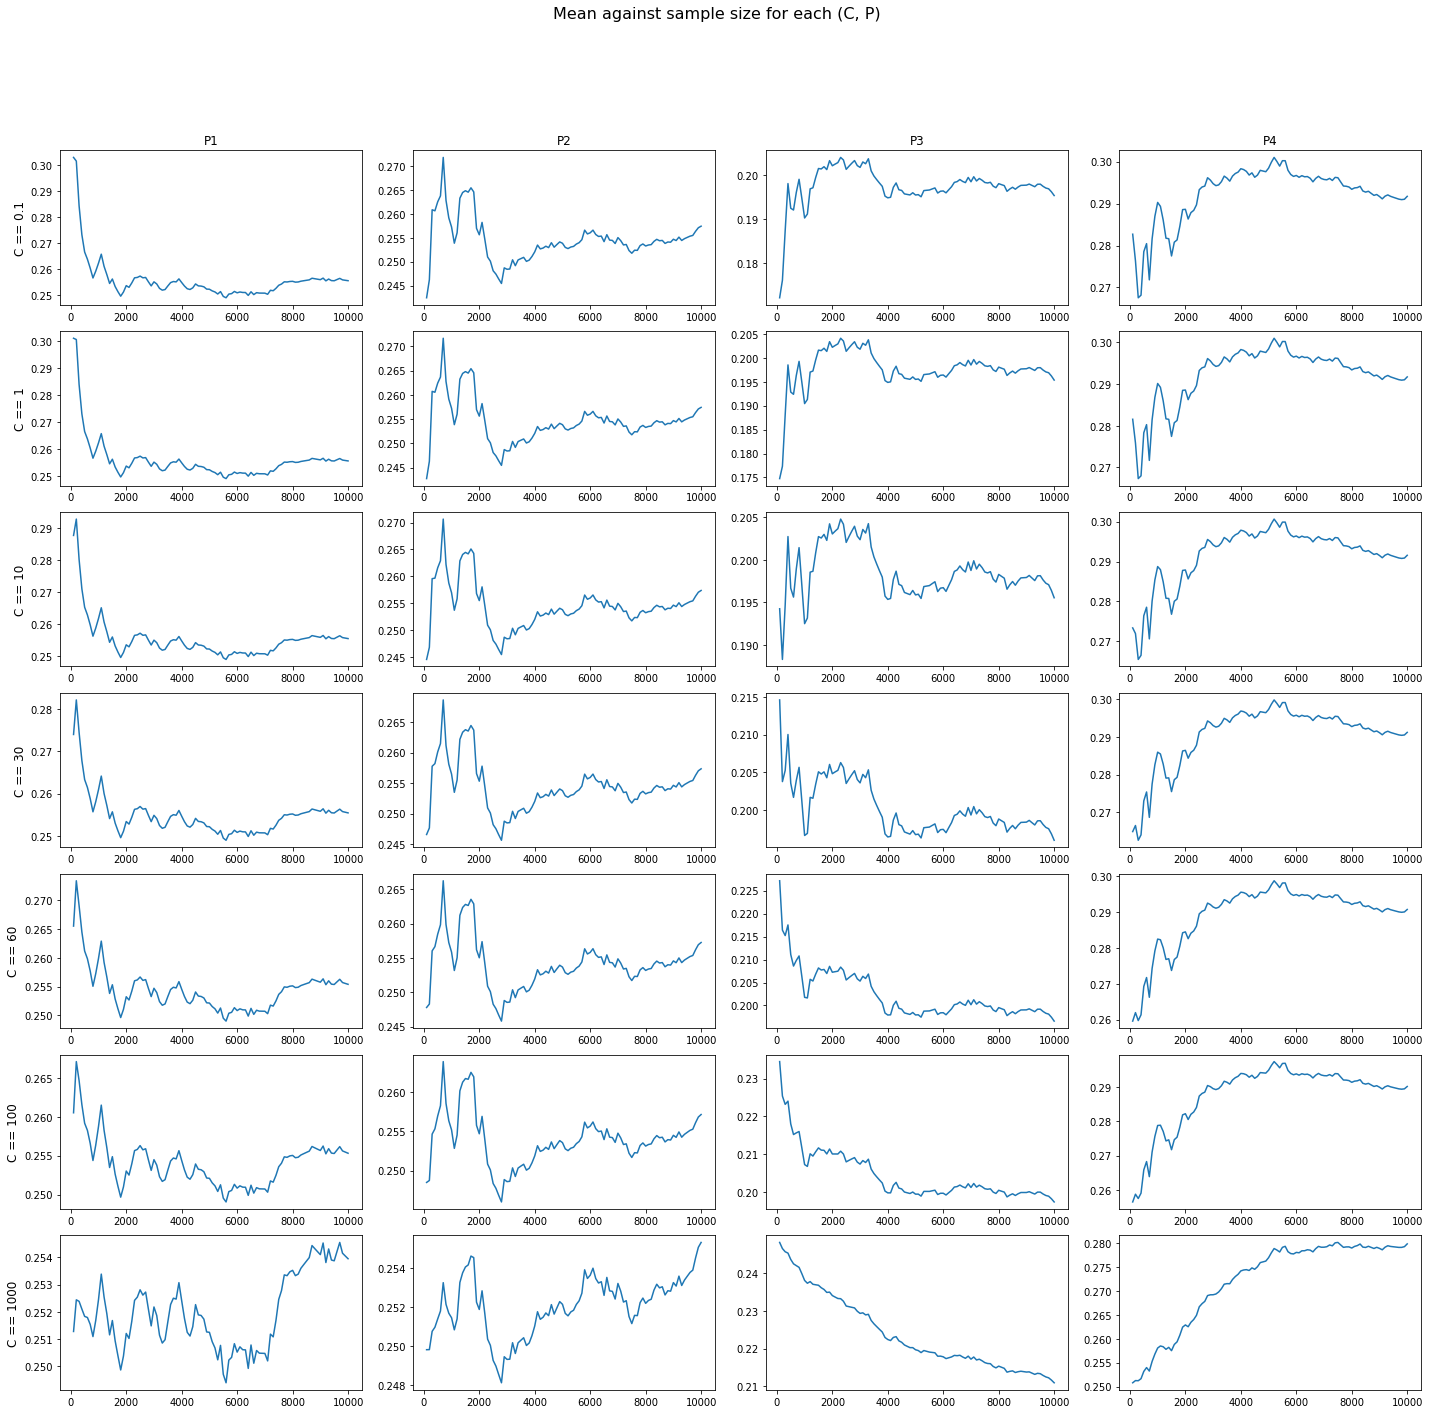

In [181]:
# for each c, we have to draw plots
# each row represents a value of c
# each col represents a p param
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(20, 20))

c_counter = 0
p_counter = 0

# for each value of c
for row in ax:
    
    # for each p
    for col in row:
        
        p_means_for_this = d_means[c_counter][:,p_counter % 4]
        
        # plot sample size against p means
        col.plot(num_throws_range, p_means_for_this)
        
        # next p
        p_counter += 1
        
    # next c
    c_counter += 1
    
    
# label everything
cols_labels = ['P{}'.format(col) for col in range(1, 5)]
rows_labels = ['C == {}'.format(row) for row in c_arr]
for a, l in zip(ax[0], cols_labels):
    a.set_title(l)
for a, l in zip(ax[:,0], rows_labels):
    a.set_ylabel(l, size='large')

# show
fig.suptitle("Mean against sample size for each (C, P)", fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

What does this say about priors and sample size? 
 - There are more spikes/oscillation when `c` grows for all `p`. It almost seems like a 'learning rate' which varies more.
 - Greater sample size is needed for small `c` to approach the true mean.
 - For larger `c`, bigger oscillations meant that the true mean was converged to faster


Based on this, I estimate that approximately:
- `P1` is 0.255
- `P2` is 0.2575
- `P3` is 0.195
- `P4` is 0.29

0.255 + 0.2575 + 0.195 + 0.29 is exactly 1.0 